## Getting Started

### Setting up the environment

Ask around to see if everyone is familiar with Anaconda, and ask what IDE they use. Encourage them to try VSCode or Jupyter Notebooks for this class

As a baseline, everyone should at least be running Python3. Go through the process of setting up a conda environment.
```cmd
conda create --name aero222 python=3.9
```
Activate the environment and install basic packages to get started.
```cmd
conda activate aero222
pip install numpy scipy matplotlib
```
If they want to use Jupyter Notebooks on VSCode, install this one too.
```cmd
pip install ipykernel
```

### Additional information

**Google is your friend.**
If ever run into an error or have a question, there's a 99% chance you can find a post where someone had the exact same question.

**Basic library functionality**
- Numpy: for using matricies
- SciPy: use as needed, it contains a number of computational tools
- Matplotlib: for plotting, based on MATLAB's plotting tool

**Additional Resources**
- "Numerical Methods in Engineering with Python3"

Import Libraries

In [1]:
import numpy as np
from math import log10, floor, factorial
import matplotlib.pyplot as plt

## Rounding with Specified Significant Digits

In [2]:
def round_to_s(x,s):
    # x: original number
    # s: number of digits to round to
    n = floor(log10(x)) + 1 - s
    xRound = 10**n * round(x * 10**-n)
    return xRound

In [3]:
sigFig = 5
piRound = round_to_s(np.pi,sigFig)

print(f'True value of pi: {np.pi}')
print(f'Pi rounded to {sigFig} values: {piRound}')

True value of pi: 3.141592653589793
Pi rounded to 5 values: 3.1416


## Round-off Error

In [4]:
diff = 5.9 - 3.1
print(diff)

sum = 0.1 + 0.2 + 0.3
ans = 0.6
print(sum == ans)

isEqual2 = round(0.1 + 0.2 + 0.3, 5)  == round(0.6, 5)
print(isEqual2)

2.8000000000000003
False
True


In [5]:
a = 1
b = 1 + 1/3 - 1/3

print(a == b)
print(a)
print(b)

True
1
1.0


In [6]:
def add_and_subtract(iterations):
    result = 1
    
    for i in range(iterations):
        result += 1/3

    for i in range(iterations):
        result -= 1/3

    return result

b = add_and_subtract(100)

print(a == b)
print(a)
print(b)

False
1
1.0000000000000002


## Truncation Error

In [7]:
sinSum = 0
x = np.pi/9
trueSin = np.sin(np.pi/9)

for i in range(5):
    sinSum = sinSum + (-1)**(i) * (x**(2*i + 1) / factorial(2*i + 1))
    print(f'Using {i}-term: {sinSum}')
    relErr = np.abs(sinSum - trueSin) / trueSin
    print(f'Relative error: {relErr}\n')
    
print(f'\nThe true sin(pi/9) is: {trueSin}')

Using 0-term: 0.3490658503988659
Relative error: 0.020600269342874112

Using 1-term: 0.34197708115325554
Relative error: 0.00012590536918222973

Using 2-term: 0.3420202684051968
Relative error: 3.657080745363703e-07

Using 3-term: 0.3420201431138706
Relative error: 6.192563178493508e-10

Using 4-term: 0.34202014332590347
Relative error: 6.86382551256509e-13


The true sin(pi/9) is: 0.3420201433256687


**Assign this example as a problem**

In [8]:
x = 9*np.pi/5
a = 3*np.pi/2
h = x - a

trueSin = np.sin(x)
print(f'True value: {trueSin}\n')

sinSum = 0
relErr = abs((sinSum - trueSin) / trueSin)
i = 0
tol = 1e-10

while(relErr > tol):
    sinSum = sinSum + (-1)**(i+1) * (h**(2*i)) / factorial(2*i)
    relErr = abs((sinSum - trueSin) / trueSin)
    print(f'{i}-term sum: {sinSum}')
    print(f'Relative error: {relErr:e}\n')
    i += 1

True value: -0.5877852522924734

0-term sum: -1.0
Relative error: 7.013016e-01

1-term sum: -0.5558678019509788
Relative error: 5.430121e-02

2-term sum: -0.5887433701749547
Relative error: 1.630048e-03

3-term sum: -0.5877699636164597
Relative error: 2.601065e-05

4-term sum: -0.5877854036591176
Relative error: 2.575203e-07

5-term sum: -0.5877852512720046
Relative error: 1.736125e-09

6-term sum: -0.5877852522974596
Relative error: 8.483087e-12



In [9]:
expSum = 0
x = 2
trueExp = np.exp(2)

relErr = 1
tol = 1e-6
i = 0

while(relErr > tol):
    expSum = expSum + ((x**i) / factorial(i))
    print(f'Using {i}-term: {expSum}')
    relErr = np.abs(expSum - trueExp) / trueExp
    i += 1

print(f'\nRelative error after {i-1} terms: {relErr}')
print(f'\nThe true e^2 is: {trueExp}')

Using 0-term: 1.0
Using 1-term: 3.0
Using 2-term: 5.0
Using 3-term: 6.333333333333333
Using 4-term: 7.0
Using 5-term: 7.266666666666667
Using 6-term: 7.355555555555555
Using 7-term: 7.3809523809523805
Using 8-term: 7.387301587301587
Using 9-term: 7.3887125220458545
Using 10-term: 7.388994708994708
Using 11-term: 7.389046015712681
Using 12-term: 7.3890545668323435

Relative error after 12 terms: 2.073469583091495e-07

The true e^2 is: 7.38905609893065


## Error Regimes

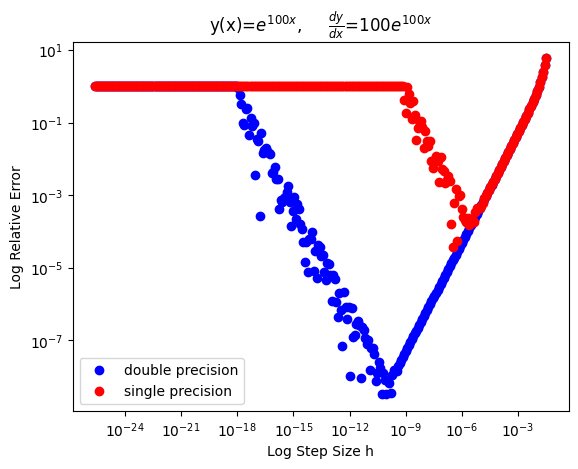

In [10]:
a = np.linspace(5,85,300)
h1 = 2.**(-a)
h2 = h1.astype('single').copy()

def y(x):
    return np.exp(100*x)

x = 0
dydx1 = (y(x+h1) - y(x)) / h1
dydx2 = (y(x+h2) - y(x)) / h2
# true value of dydx at x=0 is 100
relErr1 = np.abs(100 - dydx1) / 100
relErr2 = np.abs(100 - dydx2) / 100

plt.loglog(h1,relErr1,'bo',label='double precision')
plt.loglog(h1,relErr2,'ro',label='single precision')
plt.xlabel('Log Step Size h')
plt.ylabel('Log Relative Error')
plt.title(r'y(x)=$e^{100x}$, $\hspace{1}$ $\frac{dy}{dx}$=100$e^{100x}$')
plt.legend()
plt.show()